In [87]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler

In [104]:
data_files = {'S14':[5000, '/beegfs/desy/user/kimyoon/S14_r112_p_only_0001_cen2bst/prtf_v4_S14_r112_p_only_0001_cen2bst_4series_best20.mat
'],
             'S15': [10000,'/beegfs/desy/user/kimyoon/S14_r112_poission_AGIPD_0001_cen2bst/prtf_v4_S14_r112_poission_AGIPD_0001_cen2bst_4series_best20.mat
'],
             'S16': [20000, '/beegfs/desy/user/kimyoon/S16_r112_p_only_0001_cen2bst/fsc_cross_avg_S16_r112_p_only_0001_cen2bst_4series_avg20.mat'],
             'S17': [40000, '/beegfs/desy/user/kimyoon/S17_r112_p_only_0001_cen2bst/fsc_cross_avg_S17_r112_p_only_0001_cen2bst_4series_avg20.mat']}

data_files_AGIPD = {'S14 AGIPD Noise':[5000, '/beegfs/desy/user/kimyoon/S14_r112_poission_AGIPD_0001_cen2bst/fsc_cross_avg_S14_r112_poission_AGIPD_0001_cen2bst_4series_avg20.mat'],
             'S15 AGIPD Noise':[10000, '/beegfs/desy/user/kimyoon/S15_r112_poission_AGIPD_0001_cen2bst/fsc_cross_avg_S15_r112_poission_AGIPD_0001_cen2bst_4series_avg20.mat'],
             'S16 AGIPD Noise':[20000, '/beegfs/desy/user/kimyoon/S16_r112_poission_AGIPD_0001_cen2bst/fsc_cross_avg_S16_r112_poission_AGIPD_0001_cen2bst_4series_avg20.mat'],
             'S17 AGIPD Noise': [40000, '/beegfs/desy/user/kimyoon/S17_r112_poission_AGIPD_0001_cen2bst/fsc_cross_avg_S17_r112_poission_AGIPD_0001_cen2bst_4series_avg20.mat']}

In [ ]:
for key in data_files.keys():
    fn = data_files[key]

In [107]:
# Plotting Style Setup
plt.style.use(['science','notebook'])
# fig_w = 3.5
# fig_h = 2.625
# fig_w = 3.3
# fig_h = 2.7
fig_w = 7
fig_h = 5.25

size_scale = np.sqrt(fig_w*fig_h/(3.5*2.625))
lablesize = 16 * size_scale
plt.rcParams.update({
    "axes.labelsize": lablesize,
    "legend.fontsize": 0.6*lablesize,
    "xtick.labelsize": 0.875*lablesize, 
    "ytick.labelsize": 0.875*lablesize,
    "legend.title_fontsize" : lablesize,
    "axes.titlesize": lablesize,})          # specify font size here

plt.rcParams["axes.prop_cycle"] = cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

def plotFSC(name):
    fn = data_files[name][1]
    nframes = data_files[name][0]
    with h5py.File(fn,'r') as h5:
        fsc_avg = np.squeeze(h5['fsc_avg'][()])
        fsc_std = np.squeeze(h5['fsc_std'][()])
        r_max_1 = int(h5['r_max_1'][0][0])
        threshold_main = np.squeeze(h5['threshold_main'][()])
        figure, ax = plt.subplots(figsize=(fig_w,fig_h))
        _, caps, bars = ax.errorbar(range(r_max_1),fsc_avg[0:r_max_1],yerr=fsc_std[0:r_max_1],marker='o',capthick=1, capsize=2, markersize=2);
        ax.plot(threshold_main[0:r_max_1], color='r', lw=3, ls=':');
        [barsA.set_alpha(0.5) for barsA in bars]
        [capsA.set_alpha(0.5) for capsA in caps]

        plt.xlabel('Half period resolution (nm)');
        plt.ylabel('FSC')
        ax.set_ylim(bottom=0)
        ax.set_xticks([16,53,80,106,138])
        ax.set_xticklabels(['10.0', '3.0','2.0','1.5','1.15'])
        plt.title(f'nframes = {nframes}')
        pdf_name = 'FSC_{}.pdf'.format(name.replace(' ', '_'))
        plt.savefig(pdf_name,dpi=300)     
        

def plotFSC_in_one(data_files, title):
    figure, ax = plt.subplots(figsize=(fig_w,fig_h))
    for key in data_files.keys():
        fn = data_files[key][1]
        nframes = data_files[key][0]
        with h5py.File(fn,'r') as h5:
            fsc_avg = np.squeeze(h5['fsc_avg'][()])
            fsc_std = np.squeeze(h5['fsc_std'][()])
            r_max_1 = int(h5['r_max_1'][0][0])
            threshold_main = np.squeeze(h5['threshold_main'][()])
            _, caps, bars = ax.errorbar(range(r_max_1),fsc_avg[0:r_max_1],yerr=fsc_std[0:r_max_1],marker='o',capthick=1, 
                                        capsize=2, markersize=2,
                                       label=str(nframes));
            ax.plot(threshold_main[0:r_max_1], color='r', lw=3, ls=':');
            [barsA.set_alpha(0.4) for barsA in bars]
            [capsA.set_alpha(0.4) for capsA in caps]

    plt.xlabel('Half period resolution (nm)');
    plt.ylabel('FSC')
    ax.set_ylim(bottom=0)
    ax.set_xticks([16,53,80,106,133])
    ax.set_xticklabels(['10.0', '3.0','2.0','1.5','1.2'])
    plt.legend()
#     plt.title(title)
    pdf_name = 'FSC_{}.pdf'.format(title)
    plt.savefig(pdf_name,dpi=300)        

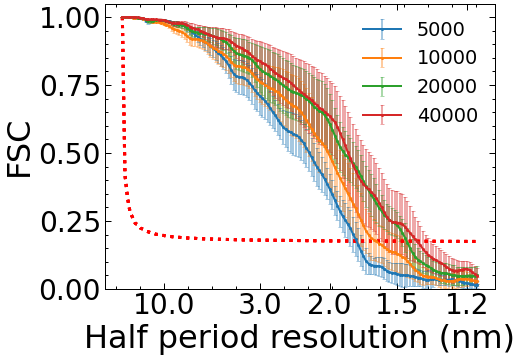

In [102]:
plotFSC_in_one(data_files,'Poission')

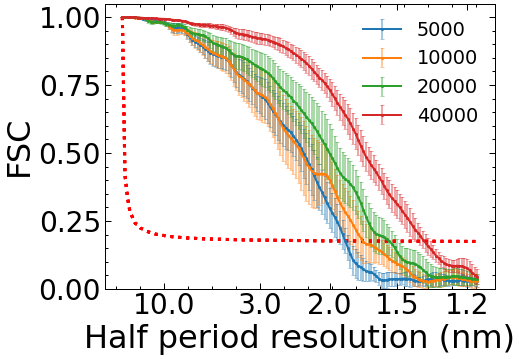

In [105]:
plotFSC_in_one(data_files_AGIPD,'Poission+AGIPD')

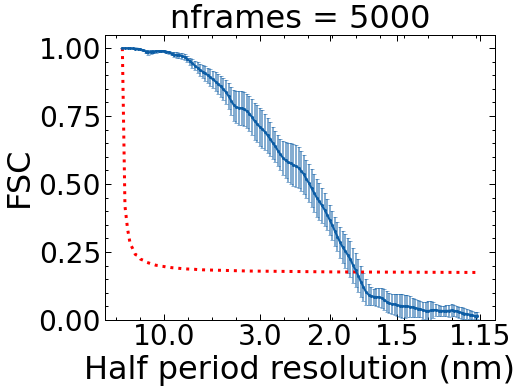

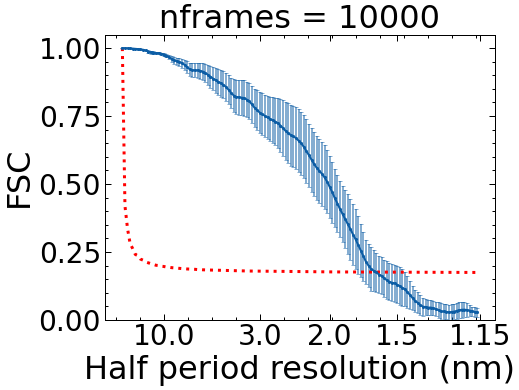

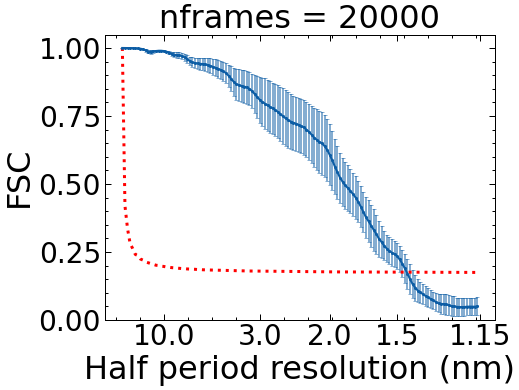

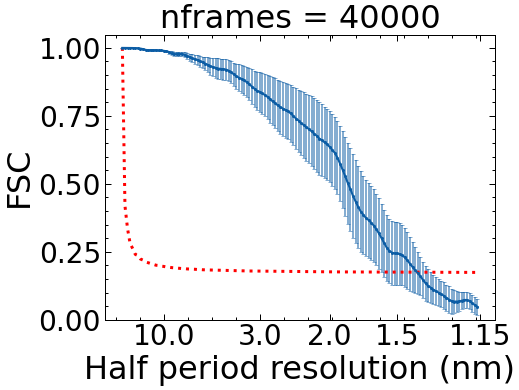

In [65]:
# fn = '/beegfs/desy/user/kimyoon/S14_r112_p_only_0001_cen2bst/fsc_cross_avg_S14_r112_p_only_0001_cen2bst_4series_avg20.mat'
plotFSC('S14')
plotFSC('S15')
plotFSC('S16')
plotFSC('S17')